In [3]:
import os
import numpy as np
import pandas as pd
from time import time
from utils import custom_preprocessing, dependencies

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams["font.size"] = 26

data_dir = "/home/stavros/DATA/AirbnbReviews"
#data_dir = "D:/"

In [4]:
area = "boston"
area_dir = os.path.join(data_dir, area)

data = pd.read_csv(os.path.join(area_dir, "reviews.csv.gz"))
print(data.shape)

clean_data = data[pd.notnull(data.comments)]
print(clean_data.shape)

(218718, 6)
(218580, 6)


Check how preprocessors work on specific examples (for sanity check)

In [13]:
ind = np.random.randint(0, len(clean_data))

text = clean_data.iloc[ind].comments
print(text)
print()
ptext = custom_preprocessing.preprocessing_pipeline(text)
print(ptext)
print()
features = dependencies.find_features(ptext)
print(features)

Thanks to the Carney family for hosting us. The house was really beautiful and the best part was its proximity to downtown Boston. Made our trip all the more memorable!

Thanks to the Host family for hosting us. The house was really beautiful and the best part was The house proximity to downtown Boston. Made us trip all the more memorable!

{'house', 'part'}


Preprocess multiple reviews (either do this or load already preprocessed reviews from a saved pickle)

In [14]:
n_samples = 2000
n_message = 500

ids = np.arange(len(clean_data))
np.random.shuffle(ids)

sampled_columns = list(clean_data.columns) + ["processed_comments", "word_features"]
sampled_data = pd.DataFrame(index=range(n_samples), columns=sampled_columns)

start_time = time()
i, ic = 0, 0
while ic < n_samples:
    data_row = clean_data.iloc[ids[i]]
    i += 1
    processed_review = custom_preprocessing.preprocessing_pipeline(data_row["comments"])
    
    if processed_review is not None:
        sampled_data.iloc[ic] = data_row
        sampled_data.iloc[ic]["processed_comments"] = processed_review
        sampled_data.iloc[ic]["word_features"] = dependencies.find_features(processed_review)
        ic += 1

    if ic % n_message == 0:
        print("{} / {} found. - time: {}".format(ic + 1, n_samples, time() - start_time))
        
# Save to pickle
sampled_data.to_pickle(os.path.join(area_dir, "reviews_with_word_features_{}samples.pkl".format(n_samples)))

501 / 2000 found. - time: 26.520755529403687
1001 / 2000 found. - time: 50.33985733985901
1501 / 2000 found. - time: 76.03535342216492
2001 / 2000 found. - time: 101.41226363182068


In [15]:
sampled_data

,listing_id,id,date,reviewer_id,reviewer_name,comments,processed_comments,word_features
0,9549850,213510284,2017-11-21,15023148,Dennis,"Gail's basement suite (bedroom, kitchenette/si...",Host basement suite bedroom kitchenette sittin...,"{host, food, street, hill, variety}"
1,18193552,520507608,2019-08-30,248627146,Claudia,Great location in the Seaport District. The co...,Great location in the Seaport District. The co...,"{concierge, host}"
2,28716462,354870110,2018-12-02,225156103,Casey,Good Location. Work out for us!,Good Location. Work out for Good Location!,{}
3,15368927,295434183,2018-07-23,133440138,Jaclyn,"Great location, very private space to stay in!",Great location very private space to stay in!,{}
4,19625919,309055885,2018-08-17,11338797,Kath,Esthers place is as nice as it looks she provi...,Esthers place is as nice as Esthers place look...,"{esthers place, travellers, extras}"
...,...,...,...,...,...,...,...,...
1995,17138041,297303366,2018-07-27,90709502,Lori,The apartment was in a great location. It was ...,The apartment was in a great location. The apa...,"{beds, apartment, location}"
1996,18342681,260372695,2018-05-04,39637463,Molly,This place is great! Super close to the airpor...,This place is great! Super close to the airpor...,"{check, place, touches, work}"
1997,17333246,157768904,2017-06-04,19598336,Danielle,I stayed at this location for a weekend while ...,I stayed at this location for a weekend while ...,"{check, host, building, delays, walking}"
1998,3965492,336747410,2018-10-14,184573774,Pierre,Our stay at May’s was rather nice. Don’t expec...,Our stay at May s was rather nice. Don s expec...,"{room, points, bit, pipes, t, stay}"


Check the features we found

In [25]:
from collections import Counter

all_features = Counter()
for features in sampled_data.word_features:
    for phrase in features:
        for word in phrase.split(" "):
            all_features[word] += 1

In [29]:
print(len(all_features))
print(all_features.most_common())

1071
[('host', 538), ('place', 457), ('location', 410), ('apartment', 227), ('stay', 192), ('room', 156), ('neighborhood', 113), ('house', 97), ('experience', 87), ('space', 86), ('bed', 81), ('hosts', 80), ('time', 67), ('communication', 65), ('area', 62), ('everything', 61), ('home', 58), ('restaurants', 56), ('noise', 47), ('problem', 43), ('parking', 41), ('issue', 40), ('bathroom', 38), ('access', 37), ('kitchen', 37), ('value', 35), ('street', 34), ('beds', 34), ('spot', 34), ('check', 30), ('walk', 29), ('amenities', 26), ('it', 25), ('work', 25), ('food', 24), ('studio', 23), ('issues', 22), ('part', 22), ('view', 22), ('places', 22), ('neighbourhood', 21), ('price', 21), ('recommendations', 21), ('breeze', 19), ('trouble', 18), ('people', 17), ('you', 17), ('family', 17), ('breakfast', 16), ('touches', 16), ('bedroom', 16), ('rooms', 16), ('unit', 15), ('top', 15), ('trip', 15), ('tips', 15), ('pleasure', 14), ('shower', 14), ('views', 14), ('building', 14), ('this', 14), ('co

### Cluster/Visualize the features using word2vec

Check cosine distance values

In [21]:
import gensim
google_vec_file = os.path.join(data_dir, "GoogleNews-vectors-negative300.bin.gz")
word2vec = gensim.models.KeyedVectors.load_word2vec_format(google_vec_file, binary=True, limit=200000)
word2vec

In [53]:
words = [word for word, counts in all_features.most_common() if counts > 2 and word in word2vec]
print(len(words))

distance_matrix = np.eye(len(words))
for i, word in enumerate(words):
    for j, word2 in enumerate(words[i:]):
        distance_matrix[i, i + j] = word2vec.distance(word, word2)

275


0.8918886431472036
0.09334183694836762
1.1293818950653076
0.08670997619628906


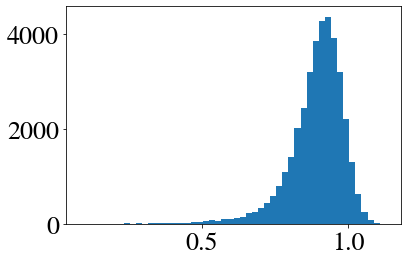

In [69]:
ids = np.triu_indices(len(words), k=1)
print(distance_matrix[ids].mean())
print(distance_matrix[ids].std())
print(distance_matrix[ids].max())
print(distance_matrix[ids].min())
plt.hist(distance_matrix[ids], bins=50)
plt.show()

In [79]:
for i in np.where(distance_matrix[ids] < 0.5)[0]:
    i1, i2 = ids[0][i], ids[1][i]
    print(words[i1], words[i2])

host hosts
place spot
place places
location proximity
apartment house
apartment bedroom
apartment condo
apartment brownstone
apartment hotel
room bathroom
room kitchen
room bedroom
room rooms
neighborhood area
neighborhood street
neighborhood neighbors
neighborhood city
house home
house bedroom
house homes
experience experiences
space spaces
bed bathroom
bed beds
bed bedroom
bed mattress
bed couch
bed sleep
time day
area areas
everything things
everything thing
everything nothing
everything everyone
home homes
restaurants restaurant
restaurants bars
restaurants shops
restaurants bakeries
problem issue
problem issues
problem trouble
problem problems
issue issues
bathroom kitchen
bathroom bedroom
bathroom shower
bathroom stairs
bathroom bedrooms
bathroom bath
bathroom bathrooms
kitchen bedroom
kitchen restaurant
kitchen bathrooms
kitchen patio
beds rooms
spot spots
walk walking
amenities accommodations
amenities spacious
amenities bathrooms
amenities facilities
it this
it me
it that
work

In [84]:
from sklearn import cluster

sorted_feature_vecs = np.array([word2vec[word] for word, counts in all_features.most_common()
                                if counts > 2 and word in word2vec])
print(sorted_feature_vecs.shape)
# Normalize
norm = (sorted_feature_vecs**2).sum(axis=-1)
sorted_feature_vecs = sorted_feature_vecs / np.sqrt(norm)[:, np.newaxis]

kmeans = cluster.KMeans(n_clusters=5)
feature_vecs_clustered = kmeans.fit_predict(sorted_feature_vecs)
print(feature_vecs_clustered.shape)

word_clusters = []
for nc in range(kmeans.n_clusters):
    ids = np.where(feature_vecs_clustered == nc)[0]
    word_clusters.append(Counter())
    for i in ids:
        word, count = all_features.most_common()[i]
        word_clusters[-1][word] = count
    
    print("Cluster {}: {} words".format(nc, len(word_clusters[nc])))

(275, 300)
(275,)
Cluster 0: 63 words
Cluster 1: 61 words
Cluster 2: 50 words
Cluster 3: 30 words
Cluster 4: 71 words


In [89]:
word_clusters[4].most_common()

[('experience', 87),
 ('communication', 65),
 ('noise', 47),
 ('access', 37),
 ('value', 35),
 ('view', 22),
 ('neighbourhood', 21),
 ('price', 21),
 ('breakfast', 16),
 ('trip', 15),
 ('tips', 15),
 ('shower', 14),
 ('person', 13),
 ('pictures', 13),
 ('accommodations', 12),
 ('me', 11),
 ('mattress', 10),
 ('air', 10),
 ('ease', 10),
 ('information', 10),
 ('quaint', 8),
 ('gem', 8),
 ('husband', 8),
 ('lady', 8),
 ('option', 8),
 ('listing', 8),
 ('directions', 7),
 ('comfortable', 7),
 ('minute', 7),
 ('shopping', 6),
 ('stylish', 6),
 ('deck', 6),
 ('freedom', 6),
 ('that', 6),
 ('response', 6),
 ('furniture', 6),
 ('weekend', 6),
 ('surprise', 6),
 ('nights', 5),
 ('vibe', 5),
 ('guy', 5),
 ('job', 5),
 ('smell', 5),
 ('environment', 5),
 ('days', 5),
 ('reviews', 5),
 ('cleanliness', 5),
 ('everyone', 4),
 ('conditioning', 4),
 ('welcome', 4),
 ('cats', 4),
 ('couch', 4),
 ('complaint', 4),
 ('recommendation', 4),
 ('which', 4),
 ('ride', 4),
 ('offerings', 3),
 ('city', 3),
 ('

PCA visualization

In [30]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=5)
sorted_feature_vecs_pca = pca.fit_transform(sorted_feature_vecs)
print(pca.explained_variance_)

[0.42254725 0.2766825  0.25591326 0.23309138 0.20947953]


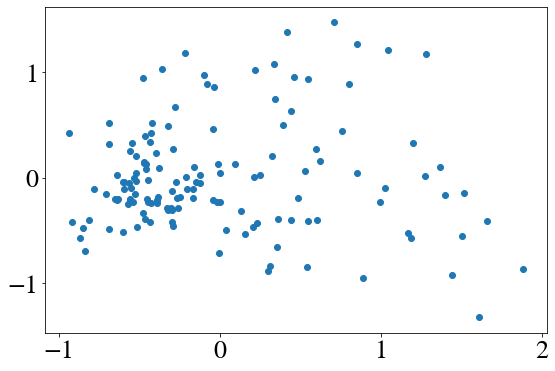

In [32]:
plt.figure(figsize=(9, 6))
plt.scatter(sorted_feature_vecs_pca[:, 0], sorted_feature_vecs_pca[:, 1])
plt.show()